In [2]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime, timedelta
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
from pylab import rcParams
import pickle
import warnings
warnings.filterwarnings("ignore")

/Users/vaishrohan/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
mapping = {}
for i in range(1,7):
    file_path = 'low_freq/house_' + str(i) + '/labels.dat'
    mapping[i] = {}
    with open(file_path) as file:
        for line in file:
            mapping[i][int(line.split(' ')[0].strip())] = line.split(' ')[1].strip() + '_' + line.split(' ')[0].strip()
print(mapping[1])

{1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'}


In [4]:
df = {}
for i in range(1,7):
    file_path = 'low_freq/house_' + str(i) + '/channel_' + str(i) + '.dat'
    df[i] = pd.read_csv(file_path , sep = ' ', names = ['TimeStamp', mapping[i][1]], dtype = {'TimeStamp': 'int64', mapping[i][1]:'float64'})
    for j in range(2, len(mapping[i])+1):
        curr_file_path =  'low_freq/house_' + str(i) + '/channel_' + str(j) + '.dat'
        curr = pd.read_csv(curr_file_path , sep = ' ', names = ['TimeStamp', mapping[i][j]], dtype = {'TimeStamp': 'int64', mapping[i][j]:'float64'})
        df[i] = pd.merge(df[i], curr, how='inner', on='TimeStamp')
    df[i]['TimeStamp'] = df[i]['TimeStamp'].astype("datetime64[s]")
        

In [5]:
for i in range(1,7):
    for j, row in df[i].iterrows():
        df[i].at[j,'Year'] = row[0].year
        df[i].at[j,'Month'] = row[0].month
        df[i].at[j,'Day'] = row[0].day
        df[i].at[j,'Hour'] = row[0].hour
        df[i].at[j,'Minute'] = row[0].minute
        df[i].at[j,'Seconds'] = row[0].second
        if row[0].weekday() in [5,6] :
            df[i].at[j, 'Holiday'] = 1
        else:
            df[i].at[j, 'Holiday'] = 0
        if row[0].hour in [0,1,2,3,4,5,6,7,20,21,22,23]:
            df[i].at[j, 'Peak Hour'] = 1
        else:
            df[i].at[j, 'Peak Hour'] = 0
        


In [38]:
mapping[1]

{1: 'mains_1',
 2: 'mains_2',
 3: 'oven_3',
 4: 'oven_4',
 5: 'refrigerator_5',
 6: 'dishwaser_6',
 7: 'kitchen_outlets_7',
 8: 'kitchen_outlets_8',
 9: 'lighting_9',
 10: 'washer_dryer_10',
 11: 'microwave_11',
 12: 'bathroom_gfi_12',
 13: 'electric_heat_13',
 14: 'stove_14',
 15: 'kitchen_outlets_15',
 16: 'kitchen_outlets_16',
 17: 'lighting_17',
 18: 'lighting_18',
 19: 'washer_dryer_19',
 20: 'washer_dryer_20'}

In [ ]:
result = {}

In [47]:
#LinearRegressor

result['Linear'] = {}
for key , target in mapping[1].iteritems():
    features = []
    for key, value in mapping[1].iteritems():
        if value != target:
            features.append(value)
    features.append('Day')
    features.append('Hour')
    features.append('Minute')
    features.append('Seconds')
    features.append('Holiday')
    features.append('Peak Hour')
    train_size = (80 *len(df[1]))/100
    x_train = df[1][features][:train_size]
    y_train = df[1][target][:train_size]
    x_test = df[1][features][train_size:]
    y_test = df[1][target][train_size:]

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred_r = regr.predict(x_test)
    result['Linear'][target] = []
    result['Linear'][target].append(y_pred_r)
    result['Linear'][target].append(mean_absolute_error(y_test,y_pred_r))



In [48]:
#RandomForestRegressor

result['RandomForest'] = {}
for key , target in mapping[1].iteritems():
    features = []
    for key, value in mapping[1].iteritems():
        if value != target:
            features.append(value)
    features.append('Day')
    features.append('Hour')
    features.append('Minute')
    features.append('Seconds')
    features.append('Holiday')
    features.append('Peak Hour')
    train_size = (80 *len(df[1]))/100
    x_train = df[1][features][:train_size]
    y_train = df[1][target][:train_size]
    x_test = df[1][features][train_size:]
    y_test = df[1][target][train_size:]

    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(x_train, y_train)
    y_pred_r = regr.predict(x_test)
    result['RandomForest'][target] = []
    result['RandomForest'][target].append(y_pred_r)
    result['RandomForest'][target].append(mean_absolute_error(y_test,y_pred_r))



In [49]:
#RidgeRegressor

result['Ridge'] = {}
for key , target in mapping[1].iteritems():
    features = []
    for key, value in mapping[1].iteritems():
        if value != target:
            features.append(value)
    features.append('Day')
    features.append('Hour')
    features.append('Minute')
    features.append('Seconds')
    features.append('Holiday')
    features.append('Peak Hour')
    train_size = (80 *len(df[1]))/100
    x_train = df[1][features][:train_size]
    y_train = df[1][target][:train_size]
    x_test = df[1][features][train_size:]
    y_test = df[1][target][train_size:]

    regr = linear_model.Ridge(alpha=.5)
    regr.fit(x_train, y_train)
    y_pred_r = regr.predict(x_test)
    result['Ridge'][target] = []
    result['Ridge'][target].append(y_pred_r)
    result['Ridge'][target].append(mean_absolute_error(y_test,y_pred_r))



In [50]:
#LassoRegressor

result['Lasso'] = {}
for key , target in mapping[1].iteritems():
    features = []
    for key, value in mapping[1].iteritems():
        if value != target:
            features.append(value)
    features.append('Day')
    features.append('Hour')
    features.append('Minute')
    features.append('Seconds')
    features.append('Holiday')
    features.append('Peak Hour')
    train_size = (80 *len(df[1]))/100
    x_train = df[1][features][:train_size]
    y_train = df[1][target][:train_size]
    x_test = df[1][features][train_size:]
    y_test = df[1][target][train_size:]

    regr = linear_model.Lasso(alpha=0.1)
    regr.fit(x_train, y_train)
    y_pred_r = regr.predict(x_test)
    result['Lasso'][target] = []
    result['Lasso'][target].append(y_pred_r)
    result['Lasso'][target].append(mean_absolute_error(y_test,y_pred_r))



In [68]:
#BaysianRidgeRegressor

result['Baysian'] = {}
for key , target in mapping[1].iteritems():
    features = []
    for key, value in mapping[1].iteritems():
        if value != target:
            features.append(value)
    features.append('Day')
    features.append('Hour')
    features.append('Minute')
    features.append('Seconds')
    features.append('Holiday')
    features.append('Peak Hour')
    train_size = (80 *len(df[1]))/100
    x_train = df[1][features][:train_size]
    y_train = df[1][target][:train_size]
    x_test = df[1][features][train_size:]
    y_test = df[1][target][train_size:]

    regr = linear_model.BayesianRidge()
    regr.fit(x_train, y_train)
    y_pred_r = regr.predict(x_test)
    result['Baysian'][target] = []
    result['Baysian'][target].append(y_pred_r)
    result['Baysian'][target].append(mean_absolute_error(y_test,y_pred_r))



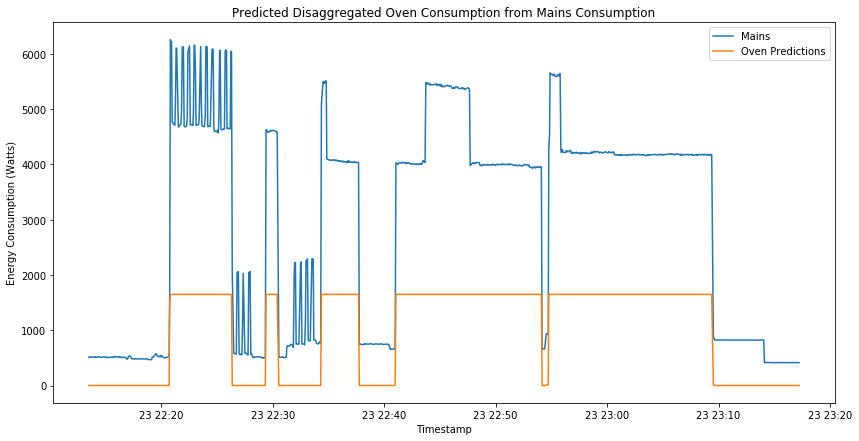

In [127]:
mains_values = df[1]['mains_1'][train_size:]+df[1]['mains_2'][train_size:]
oven_pred_values = result['RandomForest']['oven_3'][0]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
timeline = df[1]['TimeStamp'][train_size+62400:train_size+63400]
plt.plot(timeline, mains_values[62400:63400], label="Mains")
plt.plot(timeline, oven_pred_values[62400:63400], label="Oven Predictions")
plt.title('Predicted Disaggregated Oven Consumption from Mains Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (Watts)')
plt.legend()
plt.show()

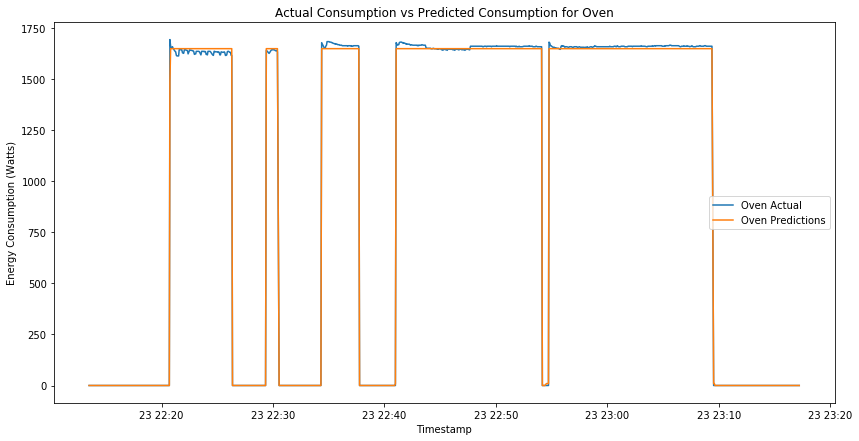

In [125]:
oven_actual_values = df[1]['oven_3'][train_size:]
oven_pred_values = result['RandomForest']['oven_3'][0]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
timeline = df[1]['TimeStamp'][train_size+62400:train_size+63400]
plt.plot(timeline, oven_actual_values[62400:63400], label="Oven Actual")
plt.plot(timeline, oven_pred_values[62400:63400], label="Oven Predictions")
plt.title('Actual Consumption vs Predicted Consumption for Oven')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (Watts)')
plt.legend()
plt.show()

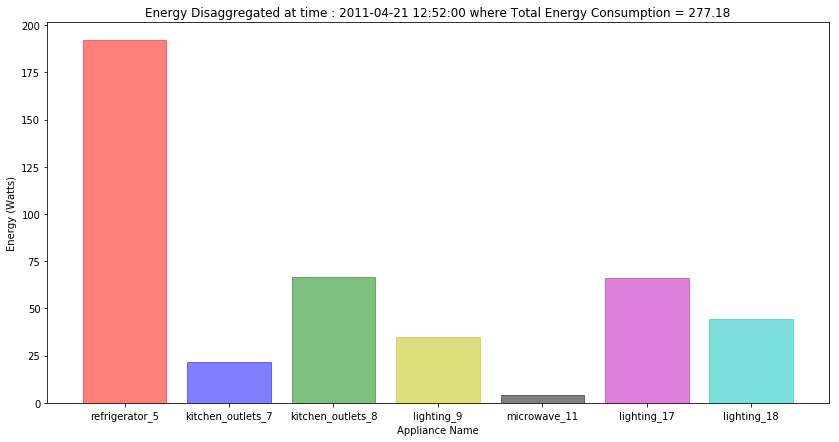

In [178]:
objects = []
performance = []
timestamp = 62800
mains_consumption = str(df[1]['mains_1'][timestamp] + df[1]['mains_2'][timestamp])
for key , target in mapping[1].iteritems():
    if target != 'mains_1' and target != 'mains_2' and result['RandomForest'][target][0][timestamp] > 2:
        objects.append(target)
        performance.append(result['RandomForest'][target][0][timestamp])

y_pos = np.arange(len(objects))

barlist = plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Energy (Watts)')
plt.xlabel('Appliance Name')
plt.title('Energy Disaggregated at time : ' + str(df[1]['TimeStamp'][timestamp]) + ' where Total Energy Consumption = ' + mains_consumption)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
barlist[3].set_color('y')
barlist[4].set_color('k')
barlist[5].set_color('m')
barlist[6].set_color('c')
plt.show()

In [182]:
output = {}
algorithms = ['RandomForest' , 'Linear' , 'Ridge' , 'Lasso', 'Baysian']
updated_objects = objects
updated_objects.append('oven_3')
updated_objects.append('oven_4')
for app in updated_objects :
    output[app] = {}
    for algo in algorithms:
        output[app][algo] = round(result[algo][app][1],5)
        
display(output)

{'kitchen_outlets_7': {'Baysian': 1.23761,
  'Lasso': 1.23546,
  'Linear': 1.2399,
  'RandomForest': 1.22596,
  'Ridge': 1.2399},
 'kitchen_outlets_8': {'Baysian': 7.36458,
  'Lasso': 7.39798,
  'Linear': 7.36346,
  'RandomForest': 4.70985,
  'Ridge': 7.36345},
 'lighting_17': {'Baysian': 12.07707,
  'Lasso': 12.16561,
  'Linear': 12.07517,
  'RandomForest': 3.36966,
  'Ridge': 12.07516},
 'lighting_18': {'Baysian': 10.20229,
  'Lasso': 10.16571,
  'Linear': 10.20155,
  'RandomForest': 7.59965,
  'Ridge': 10.20151},
 'lighting_9': {'Baysian': 22.16393,
  'Lasso': 22.27476,
  'Linear': 22.14884,
  'RandomForest': 26.5362,
  'Ridge': 22.14877},
 'microwave_11': {'Baysian': 5.59662,
  'Lasso': 5.61238,
  'Linear': 5.5963,
  'RandomForest': 1.17825,
  'Ridge': 5.59643},
 'oven_3': {'Baysian': 5.0567,
  'Lasso': 5.05589,
  'Linear': 5.05737,
  'RandomForest': 0.37884,
  'Ridge': 5.05737},
 'oven_4': {'Baysian': 7.37607,
  'Lasso': 7.32351,
  'Linear': 7.3776,
  'RandomForest': 2.75477,
  'R

In [202]:
num = 0
den = 0
for key , target in mapping[1].iteritems():
    actual_values = df[1][target][train_size:]
    pred_values = result['RandomForest'][target][0]
    for i in range(0, len(actual_values)):
        if target != 'mains_1' and target != 'mains_2':
            num += abs(pred_values[i] - actual_values[train_size+i])
        else:
            den += actual_values[train_size+i]

correctness = 1- (num / (2*den))

print(correctness)



0.9029965443579259
